# Data Load


In [1]:
import numpy as np
import math
import random
import os
import torch
import scipy.spatial.distance
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from google.colab import drive
import tensorflow as tf
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:
torch.cuda.empty_cache()

In [3]:
lxyz = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4959322/DEBY_LOD2_4959322.xyz', sep=" ", header=0)
lxyz.columns = ["x", "y", "z", "cla"]
print(lxyz.cla.value_counts())

lxyz_test = pd.read_csv('./data/test/labelledLocalCRS/DEBY_LOD2_4959459/DEBY_LOD2_4959459.xyz', sep=" ", header=0)
lxyz_test.columns = ["x", "y", "z", "cla"]
print(lxyz_test.cla.value_counts())

1     2869200
2      826645
5      746775
12     378061
16     366536
17     209118
3      111354
15      35457
11      22421
9        7342
13       1932
6        1319
14        731
Name: cla, dtype: int64
1     417280
2     276623
16    177257
5      93060
13     41630
17     24679
12     14055
3       4101
4       1072
9        682
Name: cla, dtype: int64


In [13]:
lxyz = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4959323/DEBY_LOD2_4959323.xyz', sep=" ", header=0)
lxyz.columns = ["x", "y", "z", "cla"]
print(lxyz.cla.value_counts())

lxyz_test = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4959322/DEBY_LOD2_4959322.xyz', sep=" ", header=0)
lxyz_test.columns = ["x", "y", "z", "cla"]
print(lxyz_test.cla.value_counts())

############## !! Here you can choose whether to use large dataset ###############

1     19125652
5      6440977
2      3448050
12     1979855
16     1911652
17     1746219
6       628964
3       288073
14      242680
13       24642
Name: cla, dtype: int64
1     2869200
2      826645
5      746775
12     378061
16     366536
17     209118
3      111354
15      35457
11      22421
9        7342
13       1932
6        1319
14        731
Name: cla, dtype: int64


In [ ]:
# lxyz = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4959322/DEBY_LOD2_4959322.xyz', sep=" ", header=0)
# lxyz.columns = ["x", "y", "z", "cla"]
lxyz_1 = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4906981/DEBY_LOD2_4906981.xyz', sep=" ", header=0)
lxyz_1.columns = ["x", "y", "z", "cla"]
lxyz_2 = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4959322/DEBY_LOD2_4959322.xyz', sep=" ", header=0)
lxyz_2.columns = ["x", "y", "z", "cla"]
lxyz_3 = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4959460/DEBY_LOD2_4959460.xyz', sep=" ", header=0)
lxyz_3.columns = ["x", "y", "z", "cla"]
lxyz_4 = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4959462/DEBY_LOD2_4959462.xyz', sep=" ", header=0)
lxyz_4.columns = ["x", "y", "z", "cla"]
lxyz = pd.concat([lxyz_1, lxyz_2, lxyz_3, lxyz_4], axis = 0)
print(lxyz.cla.value_counts())

lxyz_test = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4959323/DEBY_LOD2_4959323.xyz', sep=" ", header=0)
lxyz_test.columns = ["x", "y", "z", "cla"]
print(lxyz_test.cla.value_counts())

# Sample Points & Merge class

In [4]:
lclass = lxyz['cla'].replace({6:5,9:1,15:1,10:1,12:11,17:13,16:13,14:2})
print(lclass.value_counts())

lclass_test = lxyz_test['cla'].replace({6:5,9:1,15:1,10:1,12:11,17:13,16:13,14:2, 4:1})
print(lclass_test.value_counts())

1     2911999
2      827376
5      748094
13     577586
11     400482
3      111354
Name: cla, dtype: int64
1     419034
2     276623
13    243566
5      93060
11     14055
3       4101
Name: cla, dtype: int64


In [5]:
lclass = lclass.replace({5:4,13:5,11:6})
print(lclass.value_counts())
# 1: wall
# 2: window
# 3: door
# 4: molding
# 5: other
# 6: terrian

lclass_test = lclass_test.replace({5:4,13:5,11:6})
print(lclass_test.value_counts())

1    2911999
2     827376
4     748094
5     577586
6     400482
3     111354
Name: cla, dtype: int64
1    419034
2    276623
5    243566
4     93060
6     14055
3      4101
Name: cla, dtype: int64


In [6]:
lclass = lclass.replace({1:0,2:1,3:2,4:3,5:4,6:5})
print(lclass.value_counts())
# 0: wall
# 1: window
# 2: door
# 3: molding
# 4: other
# 5: terrian

lclass_test = lclass_test.replace({1:0,2:1,3:2,4:3,5:4,6:5})
print(lclass_test.value_counts())

0    2911999
1     827376
3     748094
4     577586
5     400482
2     111354
Name: cla, dtype: int64
0    419034
1    276623
4    243566
3     93060
5     14055
2      4101
Name: cla, dtype: int64


In [7]:
lxyz = lxyz.drop('cla',axis = 1) 
lxyz_test = lxyz_test.drop('cla',axis = 1) 

lxyz = lxyz.to_numpy().reshape(-1,3)
lxyz_test = lxyz_test.to_numpy().reshape(-1,3)

In [8]:
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [9]:
######################### using open3d for point processing ################
device = o3d.core.Device("CPU:0")
dtype = o3d.core.float32
pcd = o3d.t.geometry.PointCloud(device)
pcd.point.positions = o3d.core.Tensor(lxyz, dtype, device)
pcd.point.labels = o3d.core.Tensor(lclass.to_numpy().reshape(-1,1), o3d.core.int32, device)
# o3d.visualization.draw([pcd])
downpcd = pcd.voxel_down_sample(voxel_size = 0.05)

lxyz_train = downpcd.point.positions.numpy()
lclass_train = downpcd.point.labels.numpy()

pcd_train = o3d.geometry.PointCloud()
pcd_train.points = o3d.utility.Vector3dVector(lxyz_train)

# 颜色
colors = plt.get_cmap("tab20")(np.array(lclass_train).reshape(-1) / 17.0)
colors = colors[:,0:3]
pcd_train.colors=o3d.utility.Vector3dVector(colors)
# o3d.visualization.draw_geometries([pcd_train], window_name='test the color',width=800,height=600)

In [10]:
pcd_test = o3d.t.geometry.PointCloud(device)
pcd_test.point.positions = o3d.core.Tensor(lxyz_test, dtype, device)
pcd_test.point.labels = o3d.core.Tensor(lclass_test.to_numpy().reshape(-1,1), o3d.core.int32, device)
# o3d.visualization.draw([pcd])
downpcd_test = pcd_test.voxel_down_sample(voxel_size = 0.05)

lxyz_test = downpcd_test.point.positions.numpy()
lclass_test = downpcd_test.point.labels.numpy()

pcd_test = o3d.geometry.PointCloud()
pcd_test.points = o3d.utility.Vector3dVector(lxyz_test)

# 颜色
colors = plt.get_cmap("tab20")(np.array(lclass_test).reshape(-1) / 17.0)
colors = colors[:,0:3]
pcd_test.colors=o3d.utility.Vector3dVector(colors)
# o3d.visualization.draw_geometries([pcd_test], window_name='test the color',width=800,height=600)

# Add Features if NOT x,y,z

In [11]:
lxyz_train = pd.DataFrame(lxyz_train)
lxyz_train.columns = ["x", "y", "z"]

In [12]:
lxyz_test = pd.DataFrame(lxyz_test)
lxyz_test.columns = ["x", "y", "z"]

In [13]:
########## Normalization For Each Column ##########
def normalize_point_cloud(pcd):
    centroid = np.mean(pcd, axis=0) # calculation the center of point cloud
    pcd = pcd - centroid # put the center as origin
    m = np.max(np.sqrt(np.sum(pcd ** 2, axis=1))) # calculation the longest vector
    pcd_normalized = pcd / m # normalization to (-1, 1)
    return pcd_normalized


In [14]:
norm_lxyz_train = normalize_point_cloud(lxyz_train)
norm_lxyz_test = normalize_point_cloud(lxyz_test)

In [15]:
lclass_train = pd.DataFrame(lclass_train, columns = ['cla'], dtype = int)
lclass_test = pd.DataFrame(lclass_test, columns = ['cla'], dtype = int)

In [16]:
print(lclass_test.value_counts())

cla
0      232562
4      173762
1      149828
3       56466
5       12296
2        2676
dtype: int64


In [17]:
print(lclass_train)

         cla
0          0
1          0
2          0
3          0
4          0
...      ...
1241131    4
1241132    4
1241133    4
1241134    4
1241135    4

[1241136 rows x 1 columns]


In [18]:
print(lclass_test)

        cla
0         4
1         4
2         4
3         4
4         4
...     ...
627585    4
627586    4
627587    4
627588    4
627589    4

[627590 rows x 1 columns]


In [19]:
print(lxyz_train)

                x      y      z
0        4.400000   5.60  11.00
1        4.400000   5.65   9.80
2        4.400000   5.95   2.25
3        4.400000   6.00   1.65
4        4.400000   5.80   2.90
...           ...    ...    ...
1241131  1.550000   6.95   7.25
1241132  1.550000   7.00   7.60
1241133  1.550000   6.90   7.25
1241134 -9.150001  11.45   7.10
1241135 -9.350000  11.30   5.30

[1241136 rows x 3 columns]


In [20]:
print(lxyz_test)

            x          y          z
0       14.25  12.950000   7.150000
1       14.20  12.850000  19.150000
2       14.20  12.800000  19.150000
3       14.20  12.950000  19.200001
4       14.20  12.650001  19.600000
...       ...        ...        ...
627585 -13.80 -12.100000   1.600000
627586 -13.80 -12.150001   1.600000
627587 -13.80 -11.950000   1.550000
627588 -13.85 -12.050000   1.600000
627589 -13.85 -11.750000   1.600000

[627590 rows x 3 columns]


# Data Spilt

In [21]:
lxyz_train = pd.concat([norm_lxyz_train, lclass_train], axis = 1)
lxyz_test = pd.concat([norm_lxyz_test, lclass_test], axis = 1)
# print(lxyz_test.cla.value_counts())

In [22]:
print(lxyz_train)
print(lxyz_test)

                x         y         z  cla
0        0.055158  0.046167  0.145008    0
1        0.055158  0.048114  0.098288    0
2        0.055158  0.059794 -0.195653    0
3        0.055158  0.061740 -0.219013    0
4        0.055158  0.053954 -0.170347    0
...           ...       ...       ...  ...
1241131 -0.055800  0.098726 -0.000990    4
1241132 -0.055800  0.100673  0.012637    4
1241133 -0.055800  0.096780 -0.000990    4
1241134 -0.472380  0.273923 -0.006830    4
1241135 -0.480167  0.268084 -0.076909    4

[1241136 rows x 4 columns]
               x         y         z  cla
0       0.476475  0.267497 -0.053676    4
1       0.475024  0.264595  0.294547    4
2       0.475024  0.263144  0.294547    4
3       0.475024  0.267497  0.295998    4
4       0.475024  0.258791  0.307606    4
...          ...       ...       ...  ...
627585 -0.337497 -0.459419 -0.214729    4
627586 -0.337497 -0.460870 -0.214729    4
627587 -0.337497 -0.455066 -0.216180    4
627588 -0.338948 -0.457968 -0.214729

In [23]:
def spilt_data(lxyz):
  class_uniques = lxyz['cla'].unique() #把一列所有取值提出来成为一个Array 
  re = []
  for column in class_uniques:
    temp_data = lxyz[lxyz['cla'].isin([column])] #按照列的某个值取一个dataframe
    batch_num = int(len(temp_data)/1024)
    print(batch_num)
    temp_data = temp_data[0:batch_num*1024]
    re.append(temp_data)
  re = pd.concat(re)
  return re

lxyz_train = spilt_data(lxyz_train)
print(lxyz_train.cla.value_counts())
print('---------')
lxyz_test = spilt_data(lxyz_test)

488
134
102
283
187
14
0    499712
4    289792
1    191488
3    137216
5    104448
2     14336
Name: cla, dtype: int64
---------
169
146
227
55
2
12


In [24]:
print(lxyz_train)
print(lxyz_test)

                x         y         z  cla
0        0.055158  0.046167  0.145008    0
1        0.055158  0.048114  0.098288    0
2        0.055158  0.059794 -0.195653    0
3        0.055158  0.061740 -0.219013    0
4        0.055158  0.053954 -0.170347    0
...           ...       ...       ...  ...
1151117  0.331580 -0.080364 -0.158667    2
1151118  0.331580 -0.076471 -0.121681    2
1151119  0.331580 -0.080364 -0.082748    2
1151120  0.331580 -0.080364 -0.185920    2
1151121  0.331580 -0.076471 -0.131414    2

[1236992 rows x 4 columns]
               x         y         z  cla
0       0.476475  0.267497 -0.053676    4
1       0.475024  0.264595  0.294547    4
2       0.475024  0.263144  0.294547    4
3       0.475024  0.267497  0.295998    4
4       0.475024  0.258791  0.307606    4
...          ...       ...       ...  ...
612163 -0.334595 -0.452165 -0.214729    5
612164 -0.334595 -0.450714 -0.216180    5
612165 -0.334595 -0.455066 -0.214729    5
612166 -0.334595 -0.439106 -0.214729

# Dataset Preparation


In [28]:
class ToTensor(object):
    def __call__(self, pointcloud):
        assert len(pointcloud.shape)==2
#        pointcloud = pointcloud.to_numpy()
        return torch.from_numpy(pointcloud)

In [29]:
class Normalize(object):
    def __call__(self, pointcloud):
        assert len(pointcloud.shape)==2
        
        pointcloud = pointcloud.to_numpy()
        
        norm_pointcloud = pointcloud - np.mean(pointcloud, axis=0) 
        norm_pointcloud /= np.max(np.linalg.norm(norm_pointcloud, axis=1))
        norm_pointcloud[:,3] = pointcloud[:,3]

        return  norm_pointcloud

In [30]:
def default_transforms():
    return transforms.Compose([
                                Normalize(),
                                ToTensor()
                              ])

In [31]:
train_transforms = default_transforms()
batch_num_test = int(len(lxyz_test)/1024)
batch_num_train = int(len(lxyz_train)/1024)
_train = lxyz_train[0:(1024*batch_num_train)]
_test = lxyz_test[0:(1024*batch_num_test)]
print(len(_train))
print(len(_test))
print(batch_num_test)
print(batch_num_train)

data_test_temp = np.split(_test,batch_num_test)
data_train_temp = np.split(_train,batch_num_train)

data_test = [ train_transforms(test) for test in data_test_temp]
data_train = [ train_transforms(train) for train in data_train_temp]

print(len(data_test))
print('type of : ', data_test[2].size())
print(data_test[2])

1236992
625664
611
1208
611
type of :  torch.Size([1024, 4])
tensor([[ 0.0328,  0.1529,  0.7259,  4.0000],
        [ 0.0328, -0.1374, -0.6613,  4.0000],
        [ 0.0328,  0.1013, -0.2225,  4.0000],
        ...,
        [-0.0382, -0.0277,  0.2807,  4.0000],
        [-0.0382, -0.0277,  0.3259,  4.0000],
        [-0.0382, -0.0535,  0.2549,  4.0000]], dtype=torch.float64)


In [32]:
len_total = len(data_train)
print(len_total)
train_size = int(len_total*0.75)
test_size = len_total - train_size
print(train_size)
print(test_size)

1208
906
302


In [33]:
data_train, data_valid = torch.utils.data.random_split(data_train, [train_size, test_size])
print(len(data_valid))
print('type of : ', data_valid[2].size())
print(data_valid[2])

302
type of :  torch.Size([1024, 4])
tensor([[ 0.0022,  0.0193,  0.2801,  0.0000],
        [ 0.0022,  0.0399,  0.3549,  0.0000],
        [ 0.0022,  0.0399,  0.2982,  0.0000],
        ...,
        [-0.0004,  0.0374, -0.2866,  0.0000],
        [-0.0004,  0.0451, -0.3072,  0.0000],
        [-0.0004,  0.0399,  0.1127,  0.0000]], dtype=torch.float64)


In [34]:
train_loader = DataLoader(dataset=data_train, batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset=data_valid, batch_size=32)
test_loader = DataLoader(dataset=data_test, batch_size = 32)

# Model Description

In [35]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F

class Tnet(nn.Module):
   def __init__(self, k=3):
      super().__init__()
      self.k=k
      self.conv1 = nn.Conv1d(k,64,1)
      self.conv2 = nn.Conv1d(64,128,1)
      self.conv3 = nn.Conv1d(128,1024,1)
      self.fc1 = nn.Linear(1024,512)
      self.fc2 = nn.Linear(512,256)
      self.fc3 = nn.Linear(256,k*k)

      self.bn1 = nn.BatchNorm1d(64)
      self.bn2 = nn.BatchNorm1d(128)
      self.bn3 = nn.BatchNorm1d(1024)
      self.bn4 = nn.BatchNorm1d(512)
      self.bn5 = nn.BatchNorm1d(256)
       

   def forward(self, input):
      # input.shape == (bs,n,3)
      bs = input.size(0)
      xb = F.relu(self.bn1(self.conv1(input)))
      xb = F.relu(self.bn2(self.conv2(xb)))
      xb = F.relu(self.bn3(self.conv3(xb)))
      pool = nn.MaxPool1d(xb.size(-1))(xb)
      flat = nn.Flatten(1)(pool)
      xb = F.relu(self.bn4(self.fc1(flat)))
      xb = F.relu(self.bn5(self.fc2(xb)))
      
      #initialize as identity
      init = torch.eye(self.k, requires_grad=True).repeat(bs,1,1)
      if xb.is_cuda:
        init=init.cuda()
      matrix = self.fc3(xb).view(-1,self.k,self.k) + init
      return matrix


class Transform(nn.Module):
   def __init__(self):
        super().__init__()
        self.input_transform = Tnet(k=3)
        self.feature_transform = Tnet(k=64)
        self.conv1 = nn.Conv1d(3,64,1)

        self.conv2 = nn.Conv1d(64,128,1)
        self.conv3 = nn.Conv1d(128,1024,1)
       

        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(128)
        self.bn3 = nn.BatchNorm1d(1024)
       
   def forward(self, input):
        matrix3x3 = self.input_transform(input)
        # batch matrix multiplication
        xb = torch.bmm(torch.transpose(input,1,2), matrix3x3).transpose(1,2)

        xb = F.relu(self.bn1(self.conv1(xb)))

        matrix64x64 = self.feature_transform(xb)
        xb = torch.bmm(torch.transpose(xb,1,2), matrix64x64).transpose(1,2)

        xb = F.relu(self.bn2(self.conv2(xb)))
        xb = self.bn3(self.conv3(xb))
        xb = nn.MaxPool1d(xb.size(-1))(xb)
        output = nn.Flatten(1)(xb)
        return output, matrix3x3, matrix64x64

class PointNet(nn.Module):
    def __init__(self, classes = 6):
        super().__init__()
        self.transform = Transform()
        self.fc1 = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, classes)
        

        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout = nn.Dropout(p=0.3)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, input):
        xb, matrix3x3, matrix64x64 = self.transform(input)
        xb = F.relu(self.bn1(self.fc1(xb)))
        xb = F.relu(self.bn2(self.dropout(self.fc2(xb))))
        output = self.fc3(xb)
        return self.logsoftmax(output), matrix3x3, matrix64x64

In [36]:
def pointnetloss(outputs, labels, m3x3, m64x64, alpha = 0.0001):
    criterion = torch.nn.NLLLoss()
    bs=outputs.size(0)
    id3x3 = torch.eye(3, requires_grad=True).repeat(bs,1,1)
    id64x64 = torch.eye(64, requires_grad=True).repeat(bs,1,1)
    if outputs.is_cuda:
        id3x3=id3x3.cuda()
        id64x64=id64x64.cuda()
    diff3x3 = id3x3-torch.bmm(m3x3,m3x3.transpose(1,2))
    diff64x64 = id64x64-torch.bmm(m64x64,m64x64.transpose(1,2))
    return criterion(outputs, labels) + alpha * (torch.norm(diff3x3)+torch.norm(diff64x64)) / float(bs)

In [37]:
CUDA_LAUNCH_BLOCKING="1"

# Training


In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [82]:
device = torch.device('cpu')
print(device)

cpu


In [39]:
pointnet = PointNet()
pointnet.to(device);

In [40]:
optimizer = torch.optim.Adam(pointnet.parameters(), lr=0.001)

In [41]:
def train(model, train_loader, val_loader=None,  epochs=20, save=True):
    best_instance_acc = 0.0
    for epoch in range(epochs): 
        pointnet.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            labels = data[:,1,3]
            labels = labels.type(torch.LongTensor) 
            inputs, labels = data[:,:,0:3].to(device).float(), labels.to(device)
            optimizer.zero_grad()
            outputs, m3x3, m64x64 = pointnet(inputs.transpose(1,2))

            loss = pointnetloss(outputs, labels, m3x3, m64x64)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 10 == 9:    # print every 10 mini-batches
                    print('[Epoch: %d, Batch: %4d / %4d], loss: %.3f' %
                        (epoch + 1, i + 1, len(train_loader), running_loss / 10))
                    running_loss = 0.0

        pointnet.eval()
        correct = total = 0

        # validation
        if val_loader:
            with torch.no_grad():
                for data in val_loader:
                    labels = data[:,1,3]
                    labels = labels.type(torch.LongTensor) 
                    inputs, labels = data[:,:,0:3].to(device).float(), labels.to(device)
                    outputs, __, __ = pointnet(inputs.transpose(1,2))
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
            val_acc = 100. * correct / total
            print('Valid accuracy: %d %%' % val_acc)

        # save the model
        if val_acc>best_instance_acc:
            torch.save(pointnet.state_dict(), "best_model_p_xyz_sd.pth")
            best_instance_acc = val_acc

In [42]:
train(pointnet, train_loader, valid_loader,  save=False)

[Epoch: 1, Batch:   10 /   29], loss: 1.574
[Epoch: 1, Batch:   20 /   29], loss: 1.072
Valid accuracy: 32 %
[Epoch: 2, Batch:   10 /   29], loss: 0.875
[Epoch: 2, Batch:   20 /   29], loss: 0.888
Valid accuracy: 75 %
[Epoch: 3, Batch:   10 /   29], loss: 0.710
[Epoch: 3, Batch:   20 /   29], loss: 0.633
Valid accuracy: 74 %
[Epoch: 4, Batch:   10 /   29], loss: 0.750
[Epoch: 4, Batch:   20 /   29], loss: 0.688
Valid accuracy: 66 %
[Epoch: 5, Batch:   10 /   29], loss: 0.549
[Epoch: 5, Batch:   20 /   29], loss: 0.539
Valid accuracy: 69 %
[Epoch: 6, Batch:   10 /   29], loss: 0.844
[Epoch: 6, Batch:   20 /   29], loss: 0.581
Valid accuracy: 85 %
[Epoch: 7, Batch:   10 /   29], loss: 0.454
[Epoch: 7, Batch:   20 /   29], loss: 0.454
Valid accuracy: 83 %
[Epoch: 8, Batch:   10 /   29], loss: 0.488
[Epoch: 8, Batch:   20 /   29], loss: 0.454
Valid accuracy: 84 %
[Epoch: 9, Batch:   10 /   29], loss: 0.487
[Epoch: 9, Batch:   20 /   29], loss: 0.391
Valid accuracy: 87 %
[Epoch: 10, Batch: 

In [79]:
torch.save(pointnet.state_dict(), "best_model_p_xyz_sd.pth")

# Test

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
pointnet = PointNet()
pointnet.load_state_dict(torch.load('best_model_p_xyz_sd.pth'))
pointnet.eval();

In [45]:
all_preds = []
all_labels = []
with torch.no_grad():
    for i, data in enumerate(test_loader):
        print('Batch [%4d / %4d]' % (i+1, len(test_loader)))
                   
        labels = data[:,1,3]
        labels = labels.type(torch.LongTensor) 
        inputs, labels = data[:,:,0:3].float(), labels
        outputs, __, __ = pointnet(inputs.transpose(1,2))
        _, preds = torch.max(outputs.data, 1)
        all_preds += list(preds.numpy())
        all_labels += list(labels.numpy())
        


Batch [   1 /   20]
Batch [   2 /   20]
Batch [   3 /   20]
Batch [   4 /   20]
Batch [   5 /   20]
Batch [   6 /   20]
Batch [   7 /   20]
Batch [   8 /   20]
Batch [   9 /   20]
Batch [  10 /   20]
Batch [  11 /   20]
Batch [  12 /   20]
Batch [  13 /   20]
Batch [  14 /   20]
Batch [  15 /   20]
Batch [  16 /   20]
Batch [  17 /   20]
Batch [  18 /   20]
Batch [  19 /   20]
Batch [  20 /   20]


In [46]:
cm = confusion_matrix(all_labels, all_preds);
cm
print(np.bincount(all_labels))
print(np.bincount(all_preds))
print(cm)

correct_rate = np.diagonal(cm).sum()/cm.sum()
print(correct_rate)

[227 146   2  55 169  12]
[135  94   2  74 198 108]
[[120  31   0  47  29   0]
 [  7  30   2  20  85   2]
 [  0   0   0   0   2   0]
 [  0  24   0   2   4  25]
 [  8   9   0   5  78  69]
 [  0   0   0   0   0  12]]
0.3960720130932897


In [47]:
classes = {'wall & balcony & ..': 0,
           'window & blinds': 1,
           'door': 2,
           'molding & decoration': 3,
           'ground surface & terrian': 4,
           'roof & others': 5}
classes
cla_test = {'wall & balcony & ..': 0,
            'window & blinds': 1,
            'door': 2,
            'molding & decoration': 3,
            'ground surface & terrian': 4,
            'roof & others': 5}
cla_test

{'wall & balcony & ..': 0,
 'window & blinds': 1,
 'door': 2,
 'molding & decoration': 3,
 'ground surface & terrian': 4,
 'roof & others': 5}

In [48]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

# function from https://deeplizard.com/learn/video/0LhiS6yu2qQ
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


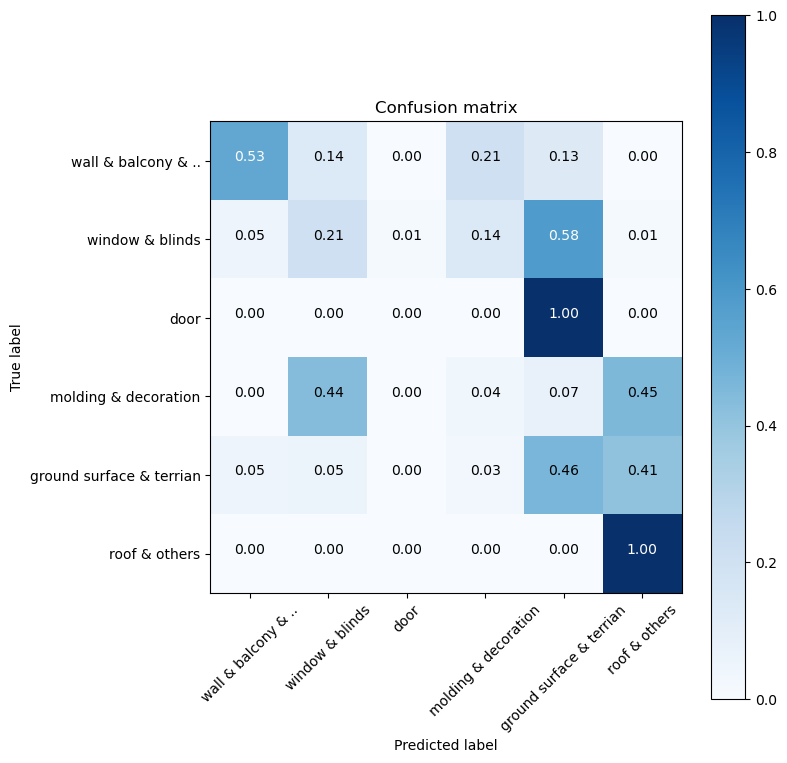

In [49]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, list(cla_test.keys()), normalize=True)

Confusion matrix, without normalization


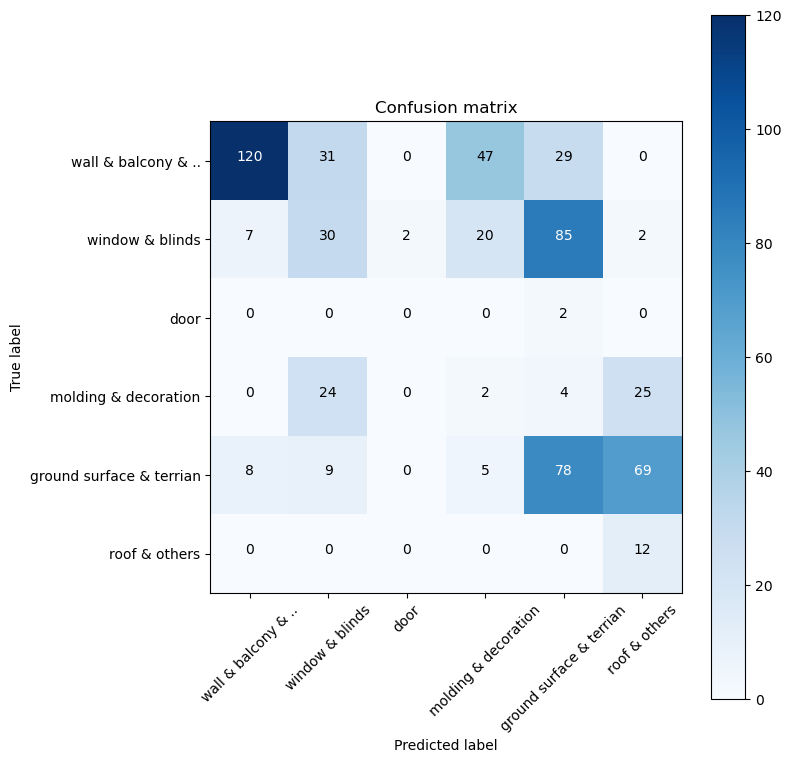

In [50]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, list(cla_test.keys()), normalize=False)